# EDA FOR EMPLOYEE ATTRITION

### IGNORE WARNINGS 

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

### LIST OF FILES IN THE DIRECTORY

In [2]:
import os
os.listdir()

['Suresh_HR_Attrition.ipynb',
 'HR_Employee_Attrition_Data.csv',
 'HR_Attrition_RandomForestModel_Utkarsh.ipynb',
 'HR_Attrition_LogisticRegression_Utkarsh.ipynb',
 '.ipynb_checkpoints']

### IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns              

### IMPORTING & READING THE DATASET

In [4]:
data = pd.read_csv('HR_Employee_Attrition_Data.csv')
pd.set_option('max_columns',None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### NUMBER OF ROWS AND COLUMNS IN DATASET

In [5]:
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns')

Dataset has 2940 rows and 35 columns


### BASIC INFO ON DATASET

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

### NUMBER OF FEATURES  AND PERCENTAGE OF NULL VALUES

In [7]:
# number of numerical and categorical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES:')
total = 0
for feature in data.columns:
    total += len(data[feature])
    
missing = data.isnull().mean()
print('There is no missing values in dataset' if total==data.size else missing)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 26 numerical features and 9 categorical features

PERCENTAGE MISSING VALUES:
There is no missing values in dataset


### LOOKING FOR DUPLICATES IN THE DATASET

In [8]:
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicated in the dataset.')

There are no duplicates in the dataset.


### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [9]:
for feature in data:
    if data[feature].dtype=='O' and feature != 'Attrition':
        if len(data[feature].unique())==1:
            print(f'** {feature} has {len(data[feature].unique())} unique vaue **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique vaue')

BusinessTravel has 3 unique vaue
Department has 3 unique vaue
EducationField has 6 unique vaue
Gender has 2 unique vaue
JobRole has 9 unique vaue
MaritalStatus has 3 unique vaue
** Over18 has 1 unique vaue **
OverTime has 2 unique vaue


In [10]:
# removing the feature

del data['Over18']

### NUMBER OF UNIQUE NUMERICAL FEATURES

In [11]:
for feature in data:
    if data[feature].dtype!='O':
        if len(data[feature].unique())==1:
            print(f'** {feature} has {len(data[feature].unique())} unique vaue **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique vaue')

Age has 43 unique vaue
DailyRate has 886 unique vaue
DistanceFromHome has 29 unique vaue
Education has 5 unique vaue
** EmployeeCount has 1 unique vaue **
EmployeeNumber has 2940 unique vaue
EnvironmentSatisfaction has 4 unique vaue
HourlyRate has 71 unique vaue
JobInvolvement has 4 unique vaue
JobLevel has 5 unique vaue
JobSatisfaction has 4 unique vaue
MonthlyIncome has 1349 unique vaue
MonthlyRate has 1427 unique vaue
NumCompaniesWorked has 10 unique vaue
PercentSalaryHike has 15 unique vaue
PerformanceRating has 2 unique vaue
RelationshipSatisfaction has 4 unique vaue
** StandardHours has 1 unique vaue **
StockOptionLevel has 4 unique vaue
TotalWorkingYears has 40 unique vaue
TrainingTimesLastYear has 7 unique vaue
WorkLifeBalance has 4 unique vaue
YearsAtCompany has 37 unique vaue
YearsInCurrentRole has 19 unique vaue
YearsSinceLastPromotion has 16 unique vaue
YearsWithCurrManager has 18 unique vaue


In [12]:
# removing the features

del data['StandardHours']
del data['EmployeeCount']
del data['EmployeeNumber']

### NUMBER OF COLUMNS AFTER REMOVING 3 FEATURES

In [13]:
row, column = data.shape
print(f'The dataset has {column} columns')

The dataset has 31 columns


### OBSERVATION ON TAGET VARIABLE

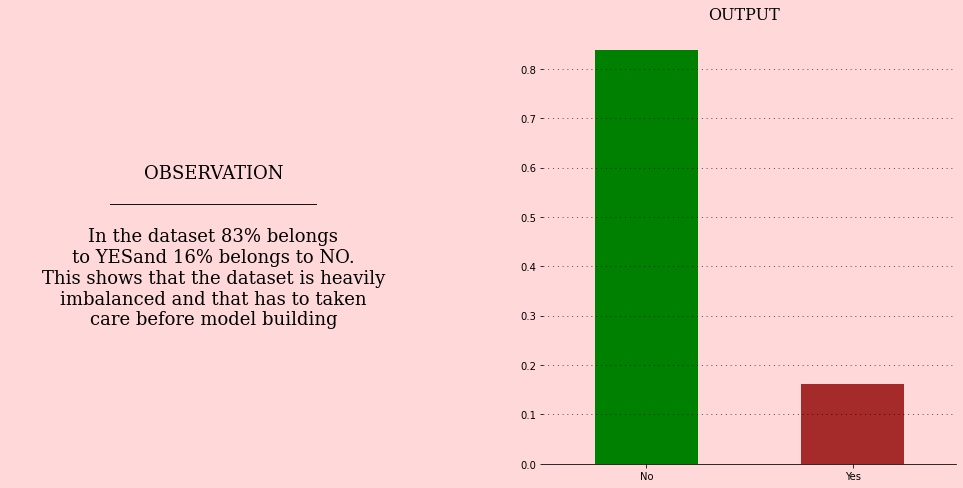

In [14]:
# Creating plot structure
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
data['Attrition'].value_counts(normalize=True).plot.bar(color=['green', 'brown'])
sec_2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=0)
sec_2.text(0.3,0.9,'OUTPUT',fontsize=16, fontfamily='serif')

# Narrating the observation
Max, Min = data['Attrition'].value_counts(normalize=True)*100
Max = int(Max)
Min = int(Min)

sec_1.text(0.5,0.5,f'OBSERVATION\n_______________________\n\nIn the dataset {Max}% belongs\nto YES\
and {Min}% belongs to NO.\nThis shows that the dataset is heavily\nimbalanced and that has to taken\
\ncare before model building',ha='center',va='center',size=18, family='serif')

# Removing labels and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)

for position in ['left', 'right', 'top', 'bottom']:
    for selection in [sec_1, sec_2]:
        if position == 'bottom' and selection == sec_2:
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

### COMPARING THE QUANTITATIVE DATA DISTRIBUTION OF ATTRITION AS HUE 

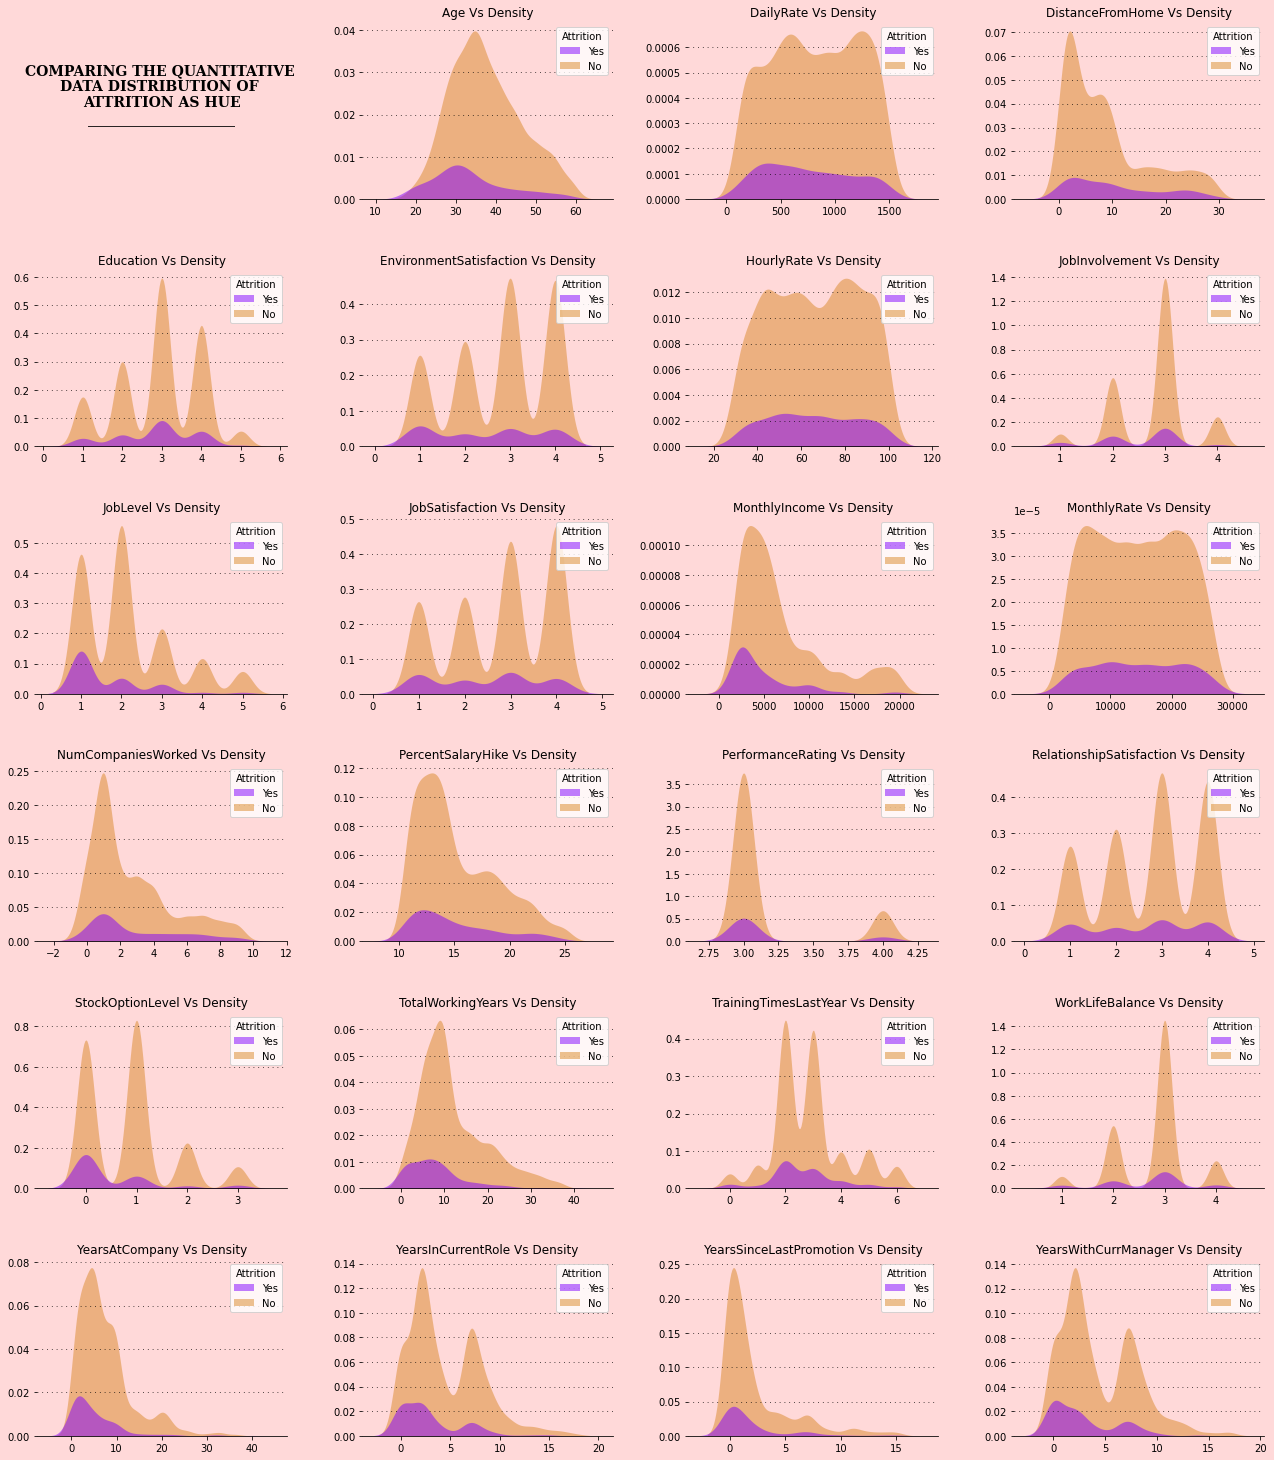

In [15]:
fig = plt.figure(figsize=(22,26))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, 
                  sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    selection.set_facecolor(bg_color)
    
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
       sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, 
       sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]
cnt = 0
for feature in data:
    if data[feature].dtype!='O':
        sns.kdeplot(feature, hue='Attrition', ax = sec[cnt],
                    fill=True, palette=["#8000ff","#da8829"], 
                    alpha=0.5, linewidth=0, data=data )
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature+' Vs Density')
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)        
        cnt += 1
        
sec_01.text(0.5,0.5,'COMPARING THE QUANTITATIVE \nDATA DISTRIBUTION OF \nATTRITION AS HUE\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)        

sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

### COMPARING THE QUALITATIVE DATA DISTRIBUTION AS HUE FOR ATTRITION

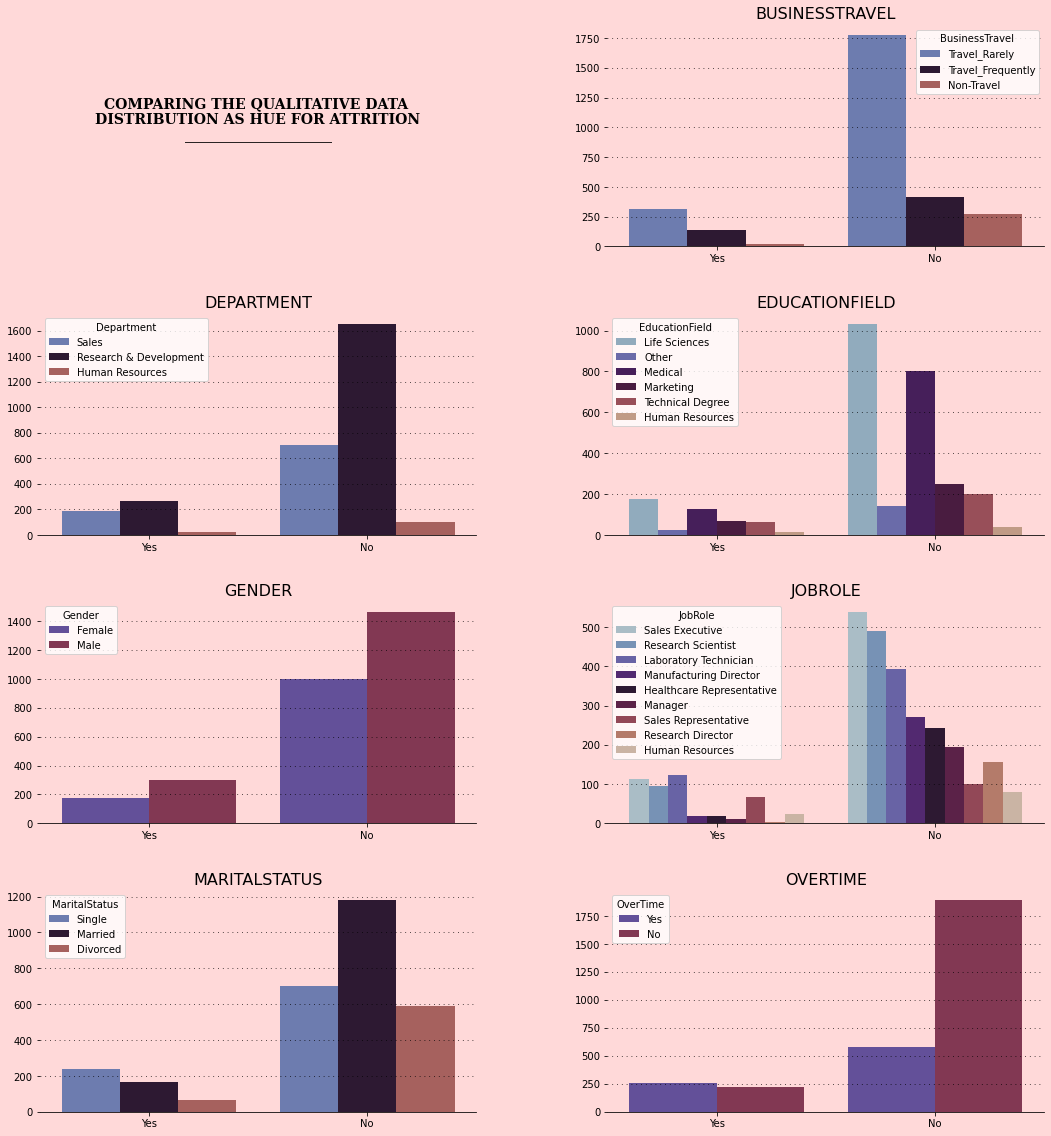

In [16]:
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
sec = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]
cnt = 0
for feature in data:
    if data[feature].dtype=='O' and feature != 'Attrition':
        sns.countplot('Attrition',hue=feature, data=data, ax=sec[cnt], palette='twilight')
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature.upper(), fontsize=16)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        for position in ['top', 'right', 'left']:
            sec[cnt].spines[position].set_visible(False)
        cnt+=1

sec_1.text(0.5,0.5,'COMPARING THE QUALITATIVE DATA \nDISTRIBUTION AS HUE FOR ATTRITION\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)        

sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_1.spines[location].set_visible(False)

### 

## UNIVARIATE ANALYSIS

### CREATING DATASET WHERE ATTTRITION IS YES

In [17]:
# Creating a dataset where only attrition is true
data_filtered = data[data['Attrition'] == 'Yes']
data_filtered.shape

(474, 31)

### ATTRITION COUNT PLOT FOR QUALITATIVE FEATURES

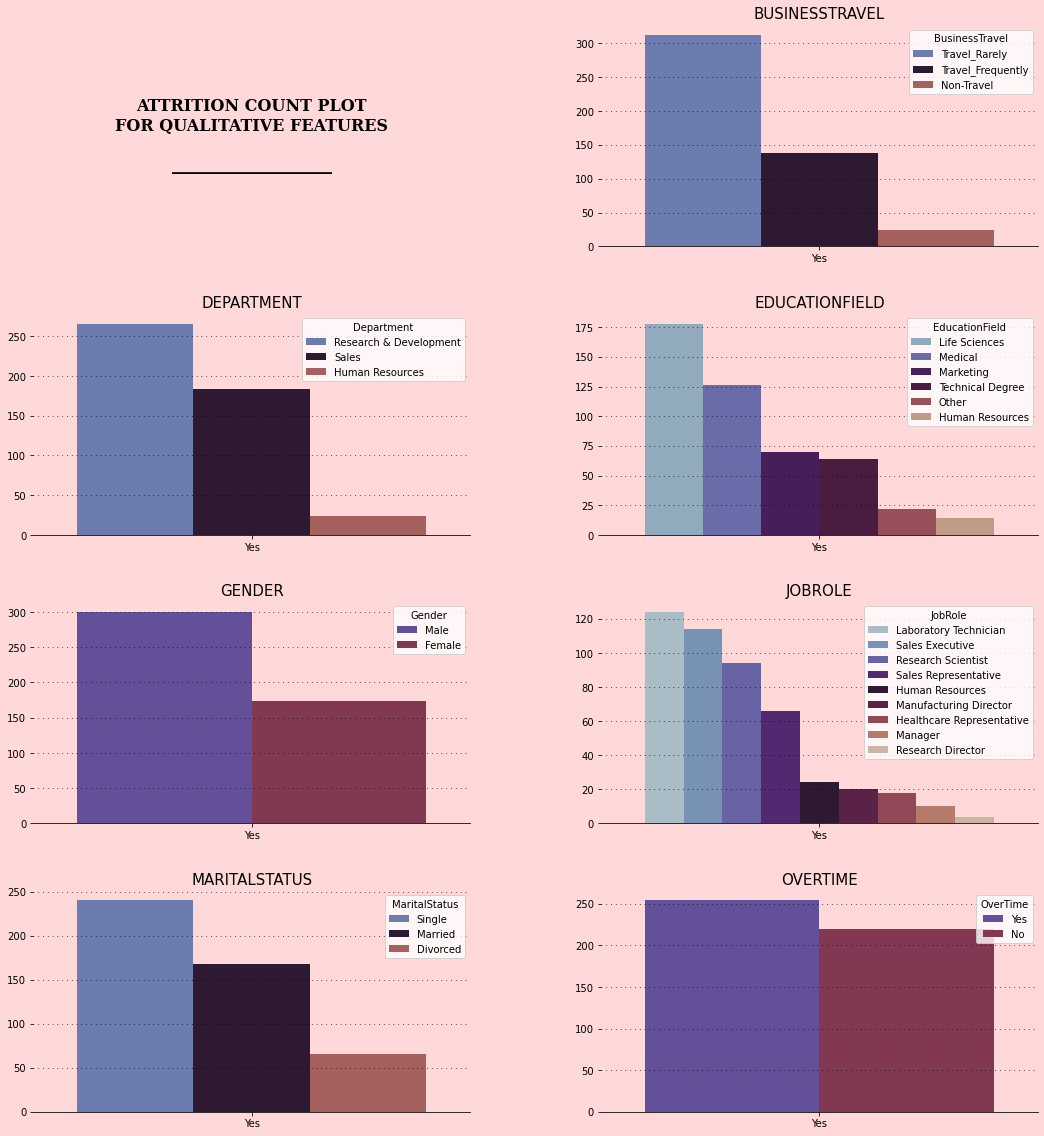

In [18]:
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
axis = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7,sec_8]
cnt = 0
for feature in data_filtered:
    if data_filtered[feature].dtype=='O' and feature != 'Attrition':
        sns.countplot(ax=axis[cnt], x = 'Attrition', hue = feature,
                      hue_order = data_filtered[feature].value_counts().index,
                      data = data_filtered,  palette='twilight')
        axis[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        axis[cnt].set_xlabel("")
        axis[cnt].set_ylabel("")
        axis[cnt].set_title(feature.upper(), fontsize=15)
        
        # Removing the spines
        for location in ['top', 'right', 'left']:
            axis[cnt].spines[location].set_visible(False)
        cnt+=1 
    
# Narrating the observation
sec_1.text(0.5,0.5,'ATTRITION COUNT PLOT\nFOR QUALITATIVE FEATURES\n\n____________________',
           ha='center',va='center',size=16,family='serif',weight=600)

# Removing the axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['bottom', 'top', 'right', 'left']:
    sec_1.spines[location].set_visible(False)

### ATTRITION COUNT PLOT FOR QUANTITATIVE FEATURES HAVING MORE THAN 30 UNIQUE VALUES

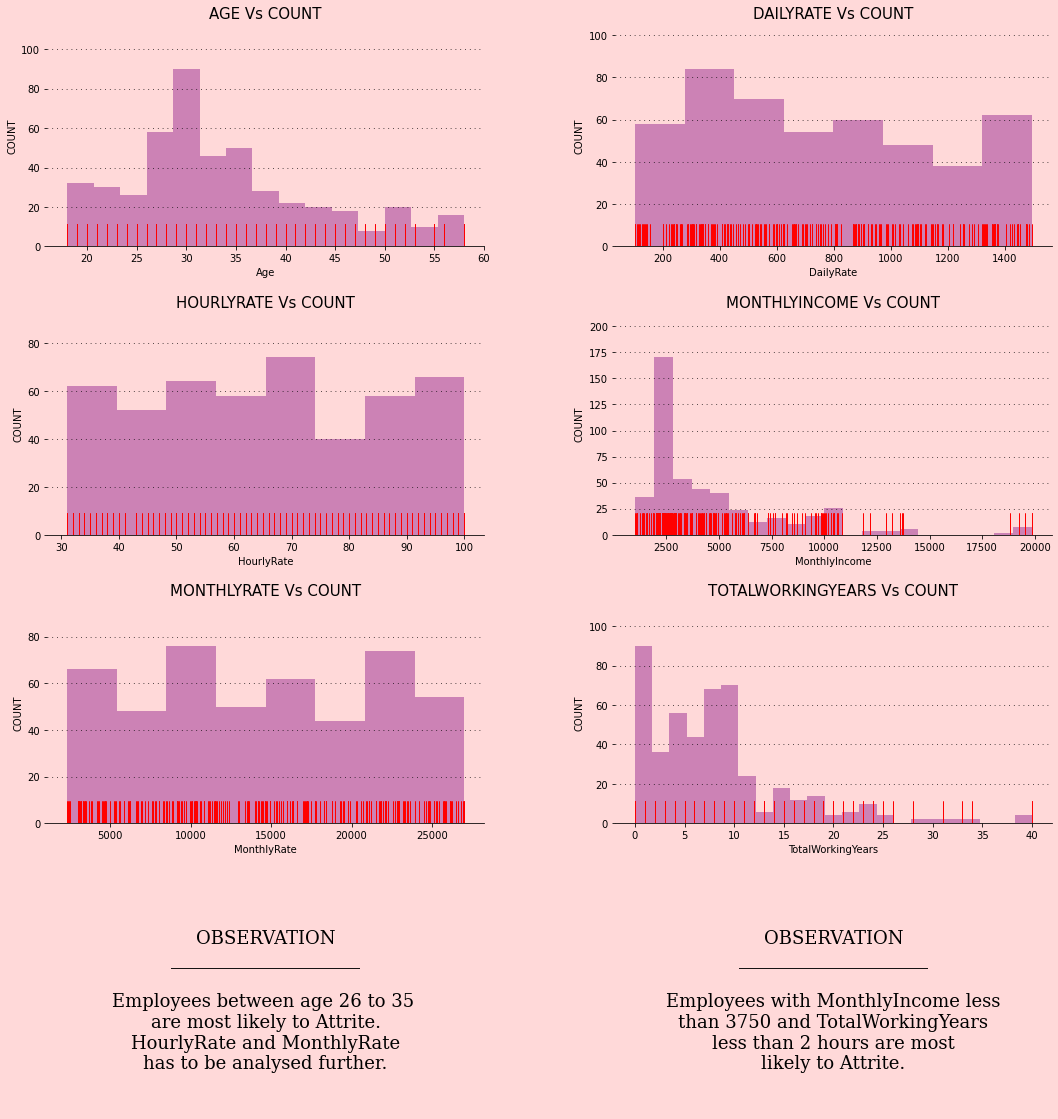

In [19]:
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3,hspace=0.3)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])
sec_5 = fig.add_subplot(spec[2,0])
sec_6 = fig.add_subplot(spec[2,1])
sec_7 = fig.add_subplot(spec[3,0])
sec_8 = fig.add_subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting graph
sec = [sec_1, sec_2, sec_3, sec_4, sec_5, sec_6]
cnt = 0
for feature in data_filtered:
    if len(data_filtered[feature].unique())>30 and data_filtered[feature].dtype!='O':
        sns.distplot(data_filtered[feature], kde=False, rug = True,
                     rug_kws={'height':0.1, 'color':'red'}, color='purple', ax=sec[cnt])
        sec[cnt].set_ylabel("COUNT")
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=15)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        # Removing the spines
        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)
        cnt += 1

# Narrating the observations        
sec_7.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees between age 26 to 35 \
\nare most likely to Attrite.\nHourlyRate and MonthlyRate\
\nhas to be analysed further.',ha='center',va='center',size=18,family='serif',weight=550)

sec_8.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees with MonthlyIncome less\
\nthan 3750 and TotalWorkingYears\nless than 2 hours are most\
\nlikely to Attrite.',ha='center',va='center',size=18,family='serif',weight=550)


# Removing the axis and spines
for location in ['top', 'bottom', 'right', 'left']:
    for section in [sec_7, sec_8]:
        section.spines[location].set_visible(False)
        section.xaxis.set_visible(False)
        section.yaxis.set_visible(False)


### ATTRITION COUNT PLOT FOR QUANTITATIVE FEATURES HAVING LESS THAN 30 UNIQUE VALUES

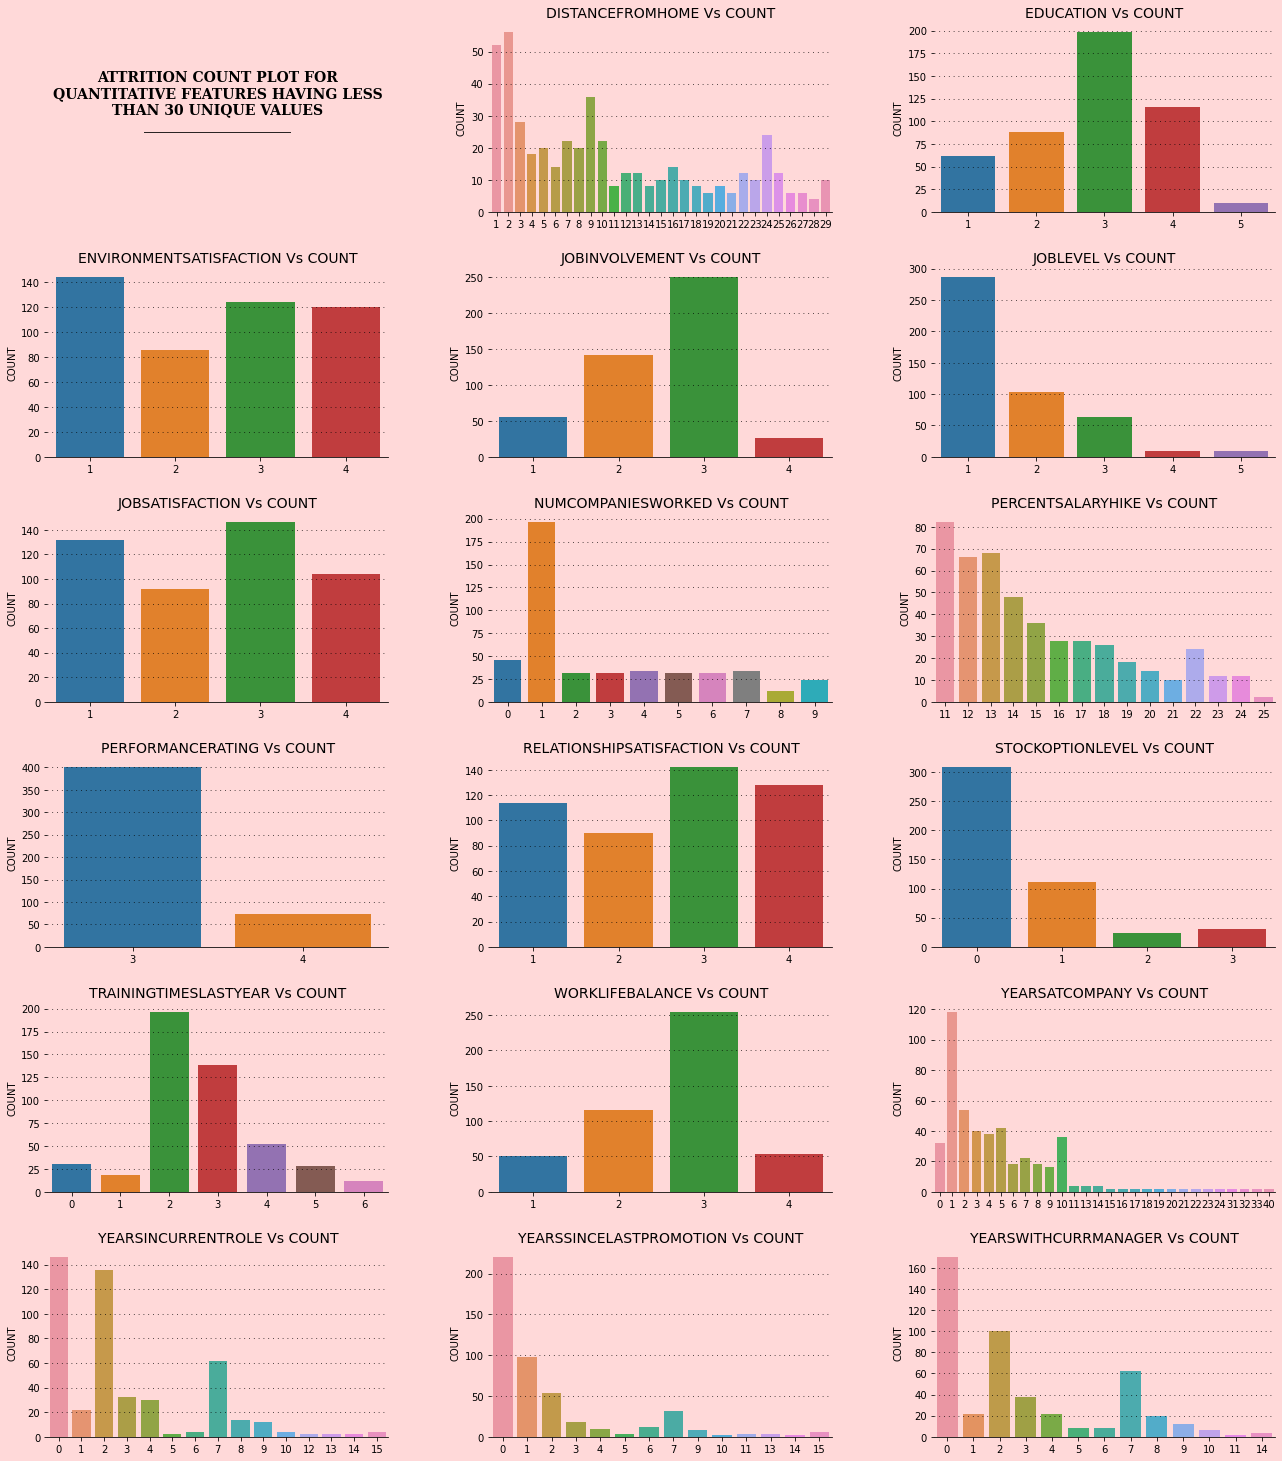

In [20]:
fig = plt.figure(figsize=(22,26))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.3, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])
sec_10 = fig.add_subplot(spec[3,0])
sec_11 = fig.add_subplot(spec[3,1])
sec_12 = fig.add_subplot(spec[3,2])
sec_13 = fig.add_subplot(spec[4,0])
sec_14 = fig.add_subplot(spec[4,1])
sec_15 = fig.add_subplot(spec[4,2])
sec_16 = fig.add_subplot(spec[5,0])
sec_17 = fig.add_subplot(spec[5,1])
sec_18 = fig.add_subplot(spec[5,2])


# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]:
    selection.set_facecolor(bg_color)
    
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,sec_09, sec_10, 
       sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]
cnt = 0
for feature in data_filtered:
    if len(data_filtered[feature].unique())<30 and data_filtered[feature].dtype!='O':
        sns.countplot(data_filtered[feature],ax=sec[cnt])
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('COUNT')
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=14)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)
            
        cnt += 1

sec_01.text(0.5,0.5,'ATTRITION COUNT PLOT FOR\nQUANTITATIVE FEATURES HAVING LESS\
\nTHAN 30 UNIQUE VALUES\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)        

sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

## BIVARIATE ANALYSIS

### JobRole Vs MonthlyIncome

In [21]:
datamean = data_filtered.groupby('JobRole')['MonthlyIncome'].mean().reset_index()
datamean.set_index('JobRole', inplace=True)
datamean.sort_values(by='MonthlyIncome', inplace=True)

Text(0.5, 0.4, 'OBSERVATION\n____________________\n\nFrom univariate analysis on categorical\nfeatures we found that sales representative,\nresearch scientist, laboratory technician\n are most likely to attrite. \n\nLooking at their average monthly income\nits clear that their monthly income is \ncomparitively low and this can be the\nreason for their attrition.')

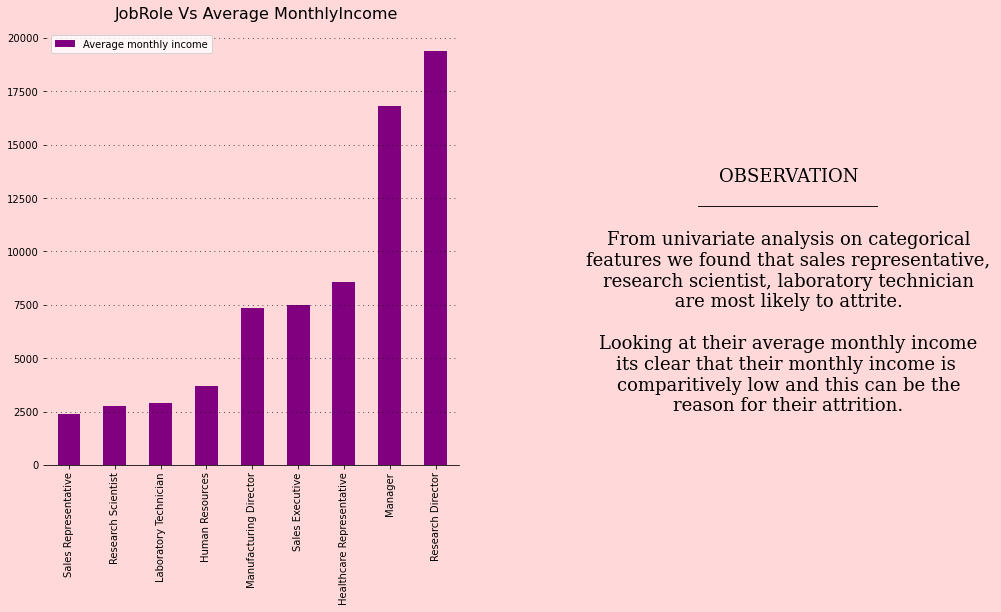

In [22]:
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

datamean.plot.bar(color='purple', ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.legend(['Average monthly income'])
sec_1.text(1,20900,'JobRole Vs Average MonthlyIncome', size=16)
sec_1.set_xlabel('')

for location in ['top','right','left','bottom']:
    for selection in [sec_1, sec_2]:
        if location == 'bottom' and selection == sec_1:
            continue
        else:
            selection.spines[location].set_visible(False)

sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)

sec_2.text(0.5,0.4,'OBSERVATION\n____________________\n\nFrom univariate analysis on categorical\
\nfeatures we found that sales representative,\nresearch scientist, laboratory technician\
\n are most likely to attrite. \n\nLooking at their average monthly income\nits clear that their\
 monthly income is \ncomparitively low and this can be the\nreason for their attrition.',
           ha='center', va='center', size=18, family='serif',weight=550)

### Analysis on Sales Executive Attrition

In [23]:
salEx_data = data_filtered[data_filtered['JobRole'] == 'Sales Executive']
salEx_data.shape

(114, 31)

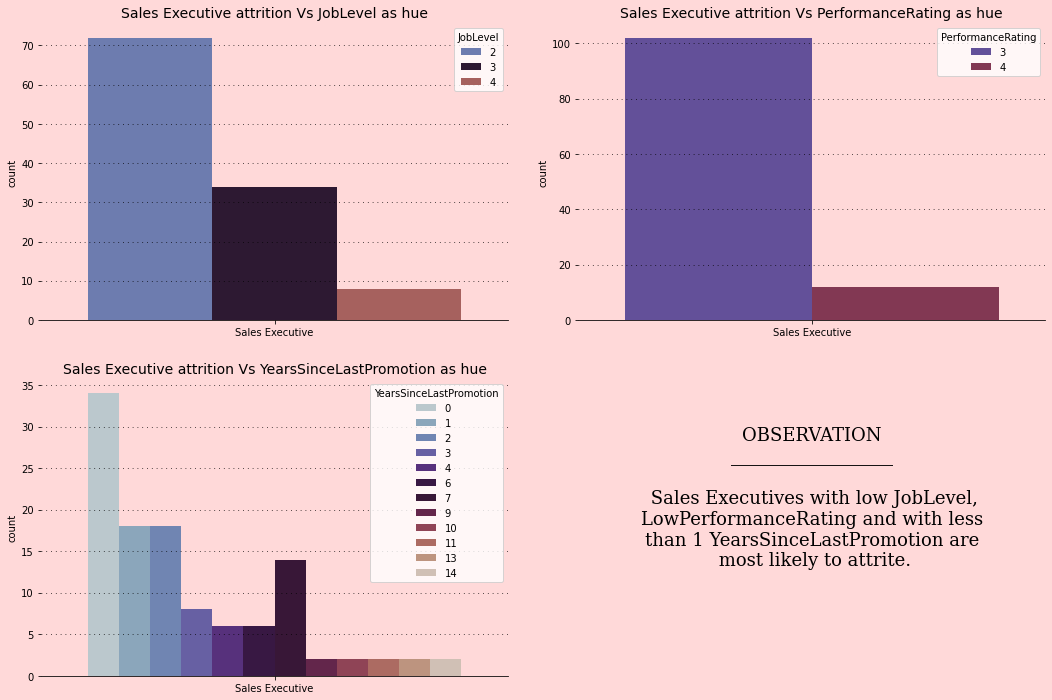

In [24]:
fig = plt.figure(figsize=(18,12))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4]:
    selection.set_facecolor(bg_color)

sec = [sec_1, sec_2, sec_3, sec_4]
cnt = 0
for hue in ['JobLevel', 'PerformanceRating', 'YearsSinceLastPromotion']:
    sns.countplot('JobRole', hue=hue, data=salEx_data, palette='twilight', ax=sec[cnt])
    sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sec[cnt].set_title('Sales Executive attrition Vs '+hue+' as hue', size=14)
    sec[cnt].set_xlabel('')
    for location in ['top', 'right', 'left']:
        sec[cnt].spines[location].set_visible(False)
    cnt+=1

sec_4.text(0.5,0.6,'OBSERVATION\n__________________\n\n Sales Executives with low JobLevel,\
\nLowPerformanceRating and with less\
\nthan 1 YearsSinceLastPromotion are\n most likely to attrite.',
           ha='center',va='center',size=18,weight=550,family='serif')    

sec_4.xaxis.set_visible(False)
sec_4.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_4.spines[location].set_visible(False)

        

### ANALYSISNG THE ATTITION BASED ON YEARS AT COMPANY

In [25]:
NumCom_data = data_filtered[data_filtered['YearsAtCompany']==1]
NumCom_data.shape

(118, 31)

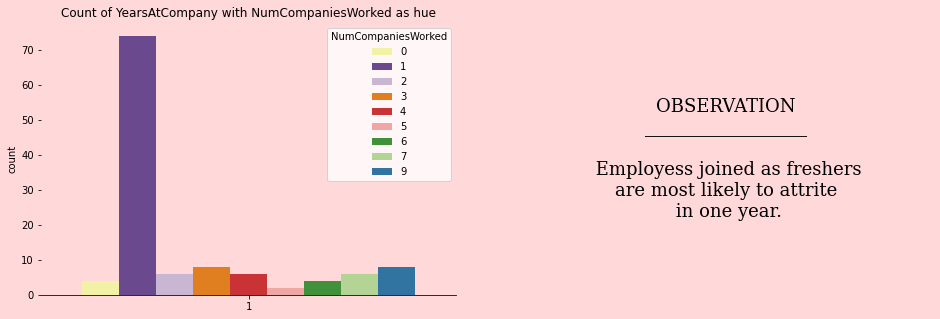

In [26]:
fig = plt.figure(figsize=(16,5))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
   

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

sns.countplot('YearsAtCompany', hue='NumCompaniesWorked', data=NumCom_data, palette = 'Paired_r', ax=sec_1)
sec_1.set_title('Count of YearsAtCompany with NumCompaniesWorked as hue')
sec_1.set_xlabel('')

sec_2.text(0.5,0.5,'OBSERVATION\n__________________\n\n Employess joined as freshers\
\nare most likely to attrite\n in one year.',
           ha='center',va='center',size=18,weight=550,family='serif')   

sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

### ANALYSIS ON ATTRITION BASED ON AGE

In [27]:
# Creating a new column for range of age:

condition = [data_filtered['Age'].between(18,25),
             data_filtered['Age'].between(26,35),
             data_filtered['Age'].between(36,45),
             data_filtered['Age'].between(46,58)]

values = ['18 to 25', '26 to 35', '36 to 45', '46 to 58']

data_filtered['AgeRange'] = np.select(condition, values)

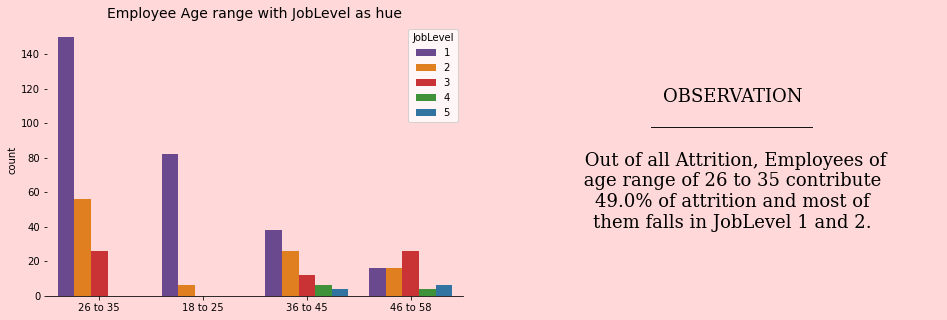

In [28]:
fig = plt.figure(figsize=(16,5))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
   

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

sns.countplot('AgeRange', hue='JobLevel', order = data_filtered['AgeRange'].value_counts().index,
              data=data_filtered, palette = 'Paired_r', ax=sec_1)
sec_1.set_title('Employee Age range with JobLevel as hue', fontsize=14)
sec_1.set_xlabel('')

drow, dcolumn = data_filtered.shape
ar_cnt = (data_filtered.AgeRange == '26 to 35').sum()
value = np.round((ar_cnt/drow),2)*100

sec_2.text(0.5,0.5,f'OBSERVATION\n__________________\n\n Out of all Attrition, Employees of\
\n age range of 26 to 35 contribute \n{value}% of attrition and most of\nthem falls in JobLevel 1 and 2.',
           ha='center',va='center',size=18,weight=550,family='serif')   

sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)